### Importação dos dados



In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja1 = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja1.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento


In [ ]:
faturamento_1 = loja1['Preço'].sum()
faturamento_2 = loja2['Preço'].sum()
faturamento_3 = loja3['Preço'].sum()
faturamento_4 = loja4['Preço'].sum()

print(f'Faturamento Loja 1: R$ {faturamento_1}\nFaturamento Loja 2: R$ {faturamento_2}\nFaturamento Loja 3: R$ {faturamento_3}\nFaturamento Loja 4: R$ {faturamento_4}')

Faturamento Loja 1: R$ 1534509.12
Faturamento Loja 2: R$ 1488459.06
Faturamento Loja 3: R$ 1464025.03
Faturamento Loja 4: R$ 1384497.58


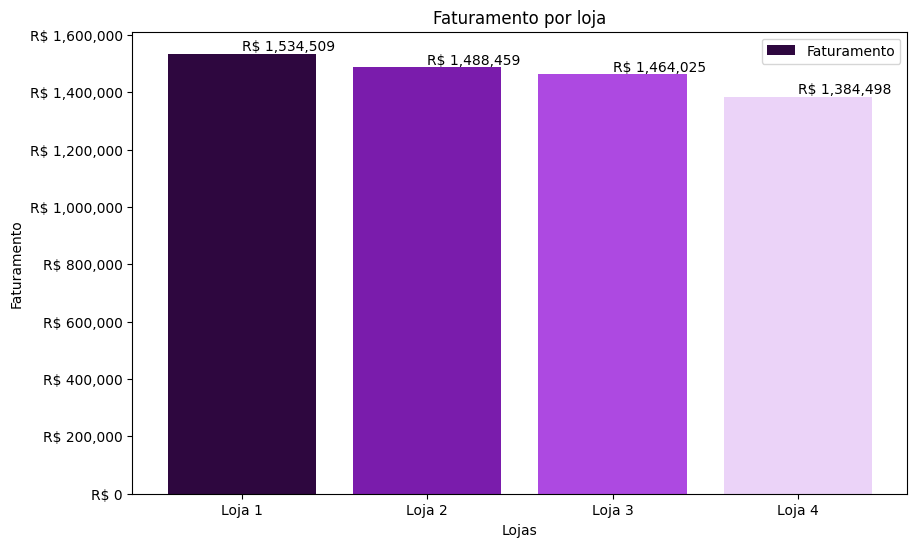

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter

loja = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']
calcular_faturamento = [faturamento_1, faturamento_2, faturamento_3, faturamento_4]
cores = ['#2E073F','#7A1CAC','#AD49E1','#EBD3F8']

#Gerando um gráfico de faturamento de todas as lojas
plt.figure(figsize=(10, 6))
plt.ylabel('Faturamento')
plt.xlabel('Lojas')
plt.bar(loja, calcular_faturamento, label='Faturamento', color=cores)
for i in range(len(loja)):
    plt.text(i, calcular_faturamento[i], f'R$ {calcular_faturamento[i]:,.0f}', ha='left', va='bottom', color='black')
plt.legend()
plt.title('Faturamento por loja')
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('R$ {x:,.0f}'))

plt.show()

# 2. Vendas por Categoria


In [ ]:
import pandas as pd

lojas = [loja1, loja2, loja3, loja4]
nomes = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']

tabelas = [
    loja.groupby('Categoria do Produto').size().rename(n)
    for loja, n in zip(lojas, nomes)
]
tabelas = pd.concat(tabelas, axis=1)
tabelas.columns = nomes
tabelas

,Loja 1,Loja 2,Loja 3,Loja 4
Categoria do Produto,,,,
brinquedos,324,313,315,338
eletrodomesticos,312,305,278,254
eletronicos,448,422,451,451
esporte e lazer,284,275,277,277
instrumentos musicais,182,224,177,170
livros,173,197,185,187
moveis,465,442,499,480
utilidades domesticas,171,181,177,201


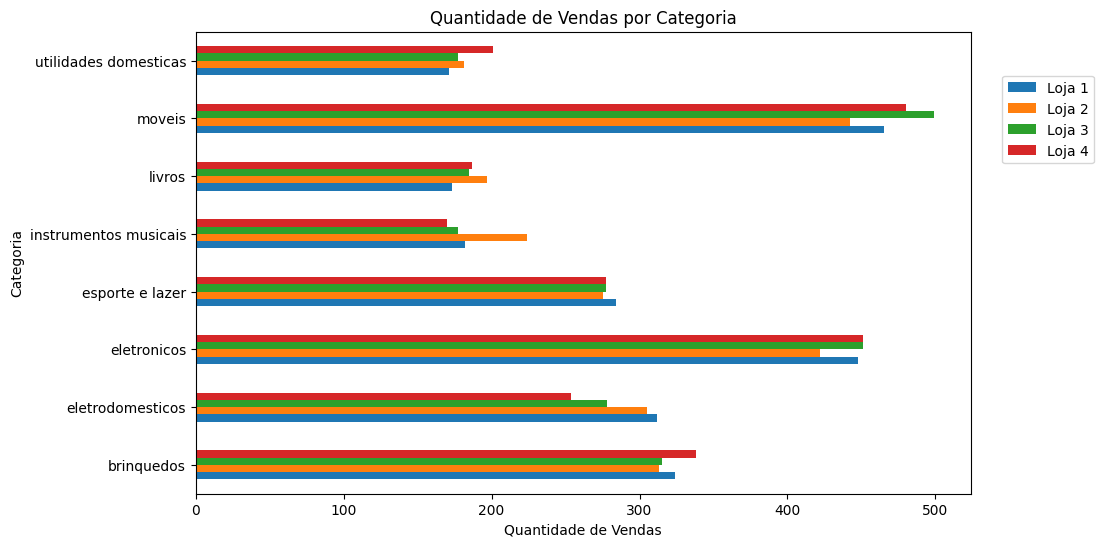

In [ ]:
import matplotlib.pyplot as plt

tabelas.plot.barh(figsize=(10, 6))
plt.legend(loc=10, bbox_to_anchor=(1.1, 0.81))
plt.ylabel('Categoria')
plt.xlabel('Quantidade de Vendas')
plt.title('Quantidade de Vendas por Categoria')
plt.show()

# 3. Média de Avaliação das Lojas

In [ ]:
#É realizado a soma das avaliações de cada loja e dividas pela quantidade de avaliações que cada loja possuí para calcular a média individual delas.

avaliacao_1 = loja1['Avaliação da compra'].sum() / len(loja1)
avaliacao_2 = loja2['Avaliação da compra'].sum() / len(loja2)
avaliacao_3 = loja3['Avaliação da compra'].sum() / len(loja3)
avaliacao_4 = loja4['Avaliação da compra'].sum() / len(loja4)

print(f'Média de avaliação Loja 1: {round(avaliacao_1,2)}\nMédia de avaliação Loja 2: {round(avaliacao_2,2)}\nMédia de avaliação Loja 3: {round(avaliacao_3,2)}\nMédia de avaliação Loja 4: {round(avaliacao_4, 2)}')



Média de avaliação Loja 1: 3.98
Média de avaliação Loja 2: 4.04
Média de avaliação Loja 3: 4.05
Média de avaliação Loja 4: 4.0


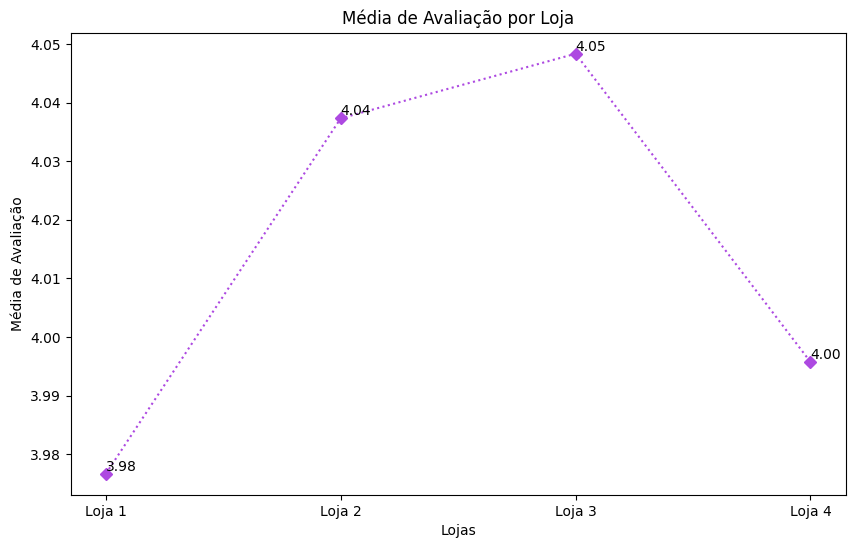

In [ ]:
import matplotlib.pyplot as plt

loja = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']
calcular_avaliacao = [avaliacao_1, avaliacao_2, avaliacao_3, avaliacao_4]

plt.figure(figsize=(10, 6))
plt.ylabel('Média de Avaliação')
plt.xlabel('Lojas')
plt.title('Média de Avaliação por Loja')
plt.plot(loja, calcular_avaliacao, marker='D', ls=':', color='#AD49E1')
for i in range(len(loja)):
    plt.text(i, calcular_avaliacao[i], f'{calcular_avaliacao[i]:.2f}', ha='left', va='bottom',color='black')
plt.show()


# 4. Produtos Mais e Menos Vendidos

In [ ]:
def produtos_mais_menos_vendidos(lojas, nomes):
    for loja, nome in zip(lojas, nomes):
        contagem = loja['Produto'].value_counts()

        mais_vendido = contagem.idxmax()
        mais_vendido_qtd = contagem.max()

        menos_vendido = contagem.idxmin()
        menos_vendido_qtd = contagem.min()

        print(f'{nome}: ')
        print(f'  Mais vendido: {mais_vendido} ({mais_vendido_qtd} vendas)')
        print(f'  Menos vendido: {menos_vendido} ({menos_vendido_qtd} vendas)\n')

produtos_mais_menos_vendidos(lojas, nomes)

Loja 1: 
  Mais vendido: Micro-ondas (60 vendas)
  Menos vendido: Headset (33 vendas)

Loja 2: 
  Mais vendido: Iniciando em programação (65 vendas)
  Menos vendido: Jogo de tabuleiro (32 vendas)

Loja 3: 
  Mais vendido: Kit banquetas (57 vendas)
  Menos vendido: Blocos de montar (35 vendas)

Loja 4: 
  Mais vendido: Cama box (62 vendas)
  Menos vendido: Guitarra (33 vendas)



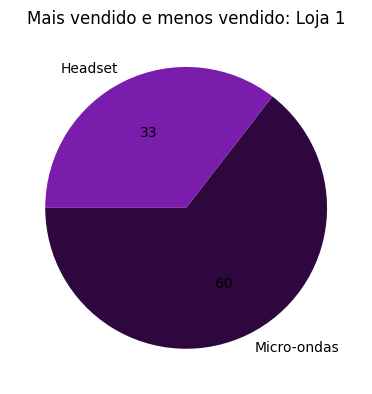

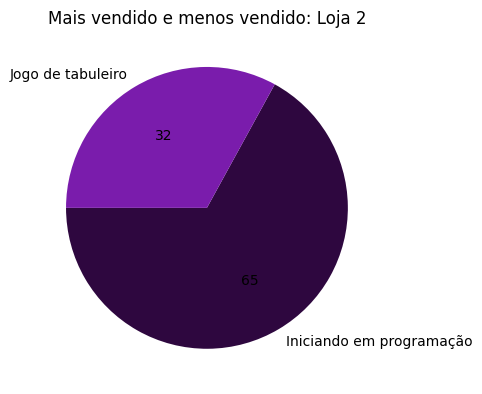

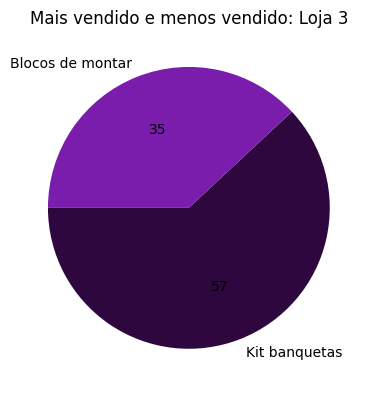

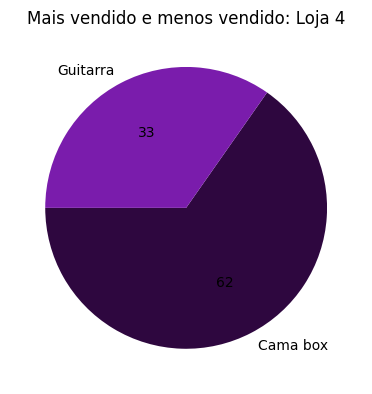

In [ ]:
def grafico_produtos_mais_menos_vendidos(lojas, nomes):
    for loja, nome in zip(lojas, nomes):
        contagem = loja['Produto'].value_counts()
        cores = ['#2E073F','#7A1CAC','#AD49E1','#EBD3F8']

        mais_vendido = contagem.idxmax()
        mais_vendido_qtd = contagem.max()

        menos_vendido = contagem.idxmin()
        menos_vendido_qtd = contagem.min()

        plt.figure(figsize=(10, 6))
        valores = [mais_vendido_qtd, menos_vendido_qtd]

        def mostrar_qtd(pct, valores):
            total = sum(valores)
            valor_real = int(round(pct * total / 100.0))
            return f'{valor_real}'

        plt.subplot(1, 2, 1)
        plt.title(f'Mais vendido e menos vendido: {nome}')
        plt.pie([mais_vendido_qtd, menos_vendido_qtd], labels=[mais_vendido, menos_vendido], colors=cores, startangle=180, autopct=lambda pct: mostrar_qtd(pct, valores))
        plt.show()

grafico_produtos_mais_menos_vendidos(lojas, nomes)

# 5. Frete Médio por Loja


In [ ]:
import numpy as np

frete_1 = np.mean(loja1['Frete'])
frete_2 = np.mean(loja2['Frete'])
frete_3 = np.mean(loja3['Frete'])
frete_4 = np.mean(loja4['Frete'])

print('Frete médio por loja:\n')
print(f'Loja 1: R$ {frete_1:.2f}\nLoja 2: R$ {frete_2:.2f}\nLoja 3: R$ {frete_3:.2f}\nLoja 4: R$ {frete_4:.2f}')


Frete médio por loja:

Loja 1: R$ 34.69
Loja 2: R$ 33.62
Loja 3: R$ 33.07
Loja 4: R$ 31.28


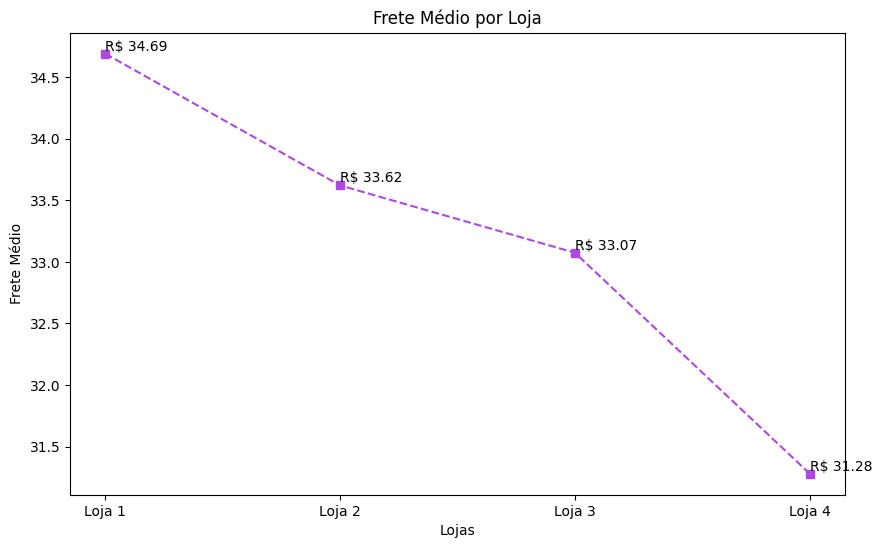

In [ ]:
import matplotlib.pyplot as plt

loja = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']
calcular_frete = [frete_1, frete_2, frete_3, frete_4]

plt.figure(figsize=(10, 6))
plt.ylabel('Frete Médio')
plt.xlabel('Lojas')
plt.title('Frete Médio por Loja')
plt.plot(loja, calcular_frete, marker='s', ls='--', color='#AD49E1')
for i in range(len(loja)):
    plt.text(i, calcular_frete[i], f'R$ {calcular_frete[i]:.2f}', ha='left', va='bottom',color='black')
plt.show()


#**Relatório de análise**

O objetivo é ajudar o Senhor João a identificar a loja com menor eficiência e decidir qual loja da sua rede Alura Store vender para iniciar um novo empreendimento. Para isso, foram analisados os dados de vendas, desempenho e avaliações das 4 lojas.

##I. Faturamento Total das Lojas:

O faturamento de cada loja oferece uma boa visão da eficiência financeira da operação. Quanto maior o faturamento, maior a presença no mercado e a atratividade para potenciais compradores.
```
Loja 1: R$ 1.534.509,12

Loja 2: R$ 1.488.459,06

Loja 3: R$ 1.464.025,03

Loja 4: R$ 1.384.497,58
```

A Loja 4 apresenta o menor faturamento, com R$ 1.384.497,58. Isso a coloca em uma posição mais desafiadora em termos de geração de lucro quando comparada com as outras lojas.


A Loja 1 tem o maior faturamento, com R$ 1.534.509,12. Ela está com uma vantagem competitiva nesse aspecto, já que gera mais lucro em comparação com as outras lojas.

##II. Média de Avaliação dos Clientes:

A satisfação dos clientes é essencial para garantir o sucesso de uma loja. As avaliações podem refletir a qualidade do atendimento, o estado dos produtos e a experiência do comprador.

```
Loja 1: 3.98

Loja 2: 4.04

Loja 3: 4.05

Loja 4: 4.00
```

A Loja 1 tem a menor avaliação (3.98), o que sugere que os clientes não estão tão satisfeitos com o serviço ou a qualidade dos produtos. Embora a Loja 3 tenha a melhor avaliação (4.05), a diferença não é grande.

##III. Vendas por Categoria de Produtos:

Analisando as categorias de produtos, podemos ver quais lojas têm um desempenho mais equilibrado em termos de vendas e quais apresentam mais dificuldades em algumas categorias.

- A Loja 4 apresenta boas vendas em móveis e eletrônicos, mas a Loja 1 tem um desempenho muito bom em móveis também. No entanto, a Loja 4 tem um desempenho mais baixo nas categorias de instrumentos musicais e utilidades domésticas, o que indica que a loja pode ter dificuldades em manter a diversidade e o equilíbrio nas vendas.

Vendas por Categoria:

####**Loja 1:**
```
Brinquedos: 324

Eletrodomésticos: 312

Eletrônicos: 448

Esporte e lazer: 284

Instrumentos musicais: 182

Livros: 173

Móveis: 465

Utilidades domésticas: 171
```
####**Loja 2:**
```
Brinquedos: 313

Eletrodomésticos: 305

Eletrônicos: 422

Esporte e lazer: 275

Instrumentos musicais: 224

Livros: 197

Móveis: 442

Utilidades domésticas: 181
```
####**Loja 3:**
```
Brinquedos: 315

Eletrodomésticos: 278

Eletrônicos: 451

Esporte e lazer: 277

Instrumentos musicais: 177

Livros: 185

Móveis: 499

Utilidades domésticas: 177
```
####**Loja 4:**
```
Brinquedos: 338

Eletrodomésticos: 254

Eletrônicos: 451

Esporte e lazer: 277

Instrumentos musicais: 170

Livros: 187

Móveis: 480

Utilidades domésticas: 201
```
##IV. Produtos Mais e Menos Vendidos:

####**Loja 1:**
``````
Mais vendido: Micro-ondas (60 vendas)

Menos vendido: Headset (33 vendas)
``````
####**Loja 2:**
``````
Mais vendido: Iniciando em Programação (65 vendas)

Menos vendido: Jogo de Tabuleiro (32 vendas)
``````
####**Loja 3:**
``````
Mais vendido: Kit Banquetas (57 vendas)

Menos vendido: Blocos de Montar (35 vendas)
``````
####**Loja 4:**
``````
Mais vendido: Cama Box (62 vendas)

Menos vendido: Guitarra (33 vendas)
``````
É possível identificar que a Loja 3 teve o produto mais vendido com a menor quantidade de vendas (57 unidades de Kit Banquetas), indicando uma menor força de vendas mesmo em seus itens mais populares. Considerando o volume do produto mais vendido, que é um indicador da atratividade geral da loja, a Loja 3 foi a que apresentou o pior desempenho de vendas.

A Loja 2 apresentou o produto menos vendido com o menor volume (32 unidades de Jogo de Tabuleiro), mas ainda assim teve um produto mais vendido com o maior desempenho (65 unidades).

##V. Frete Médio por Loja:

O frete médio impacta diretamente os custos operacionais e pode influenciar a experiência do cliente. Quanto mais baixo o frete, mais atrativo se torna para os clientes fazerem compras.
```
Loja 1: R$ 34.69

Loja 2: R$ 33.62

Loja 3: R$ 33.07

Loja 4: R$ 31.28
```

- A Loja 4 possui o frete médio mais baixo (R$ 31,28), o que a torna mais atrativa para o cliente em termos de custo de entrega.

- A Loja 1 possui o frete mais alto (R$ 34,69), o que pode representar uma barreira adicional para o consumidor, especialmente em compras de menor valor.

#**Conclusão:**
Após uma análise dos dados de faturamento, avaliações de clientes, vendas por categoria, desempenho de produtos e frete médio conclui-se que a Loja 1 é a mais indicada para ser vendida, pois ela representa a operação menos eficiente da rede atualmente.


Os principais fatores que levam a essa decisão são:

- Menor média de avaliação dos clientes (3,98), indicando menor satisfação e possível dificuldade em fidelizar compradores.

- Desempenho abaixo da média em categorias importantes.

- Desempenho apenas mediano nas demais categorias, sem grande destaque competitivo.
